<a href="https://colab.research.google.com/github/Reetabisht/Data-Preprocessing-and-EDA-for-Emotion-Sentiment-Analysis/blob/main/Emotion_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##About Dataset
**Introduction:**

 "Emotions" dataset – a collection of English Twitter messages meticulously annotated with six fundamental emotions: anger, fear, joy, love, sadness, and surprise. This dataset serves as a valuable resource for understanding and analyzing the diverse spectrum of emotions expressed in short-form text on social media.

**About the Dataset:**

Each entry in this dataset consists of a text segment representing a Twitter message and a corresponding label indicating the predominant emotion conveyed. The emotions are classified into six categories: **sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5)**. Whether you're interested in sentiment analysis, emotion classification, or text mining, this dataset provides a rich foundation for exploring the nuanced emotional landscape within the realm of social media.

**Key Features:**

**text:** A string feature representing the content of the Twitter message.

**label:** A classification label indicating the primary emotion, with values ranging from 0 to 5.


**Potential Use Cases:**

**1 Sentiment Analysis:** Uncover the prevailing sentiments in English Twitter messages across various emotions.

**2 Emotion Classification:** Develop models to accurately classify tweets into the six specified emotion categories.

**3 Textual Analysis:** Explore linguistic patterns and expressions associated with different emotional states.

In [ ]:
# Prior steps to follow to use  Kaggle Dataset Directly without downloading them into our local system.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d nelgiriyewithana/emotions

 96% 15.0M/15.7M [00:00<00:00, 25.2MB/s]
100% 15.7M/15.7M [00:00<00:00, 16.6MB/s]


In [ ]:
# Since our Dataset has been downloaded in zip format so our next aim is to unzip the file
import zipfile
zip_ref = zipfile.ZipFile('/content/emotions.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
# Reading Data into dataframe
df = pd.read_csv('/content/text.csv')
df

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...,...
416804,416804,i feel like telling these horny devils to find...,2
416805,416805,i began to realize that when i was feeling agi...,3
416806,416806,i feel very curious be why previous early dawn...,5
416807,416807,i feel that becuase of the tyranical nature of...,3


In [ ]:
# Some basic checks
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  416809 non-null  int64 
 1   text        416809 non-null  object
 2   label       416809 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.5+ MB


## Text Preprocessing

In [ ]:
# Remove special Characters/links
import re # Regular expression
def text_cleaner(t):
  text = re.sub("[@&][A-Za-z)-9_]+",'',t) # removing mentions
  text = re.sub(r"http\S+",'',text) # removing websites links
  return pd.Series([text])


In [ ]:
# Adding new column in Dataset with cleaned text
df['Cleaned_text'] = df.text.apply(text_cleaner)
df

,Unnamed: 0,text,label,Cleaned_text
0,0,i just feel really helpless and heavy hearted,4,i just feel really helpless and heavy hearted
1,1,ive enjoyed being able to slouch about relax a...,0,ive enjoyed being able to slouch about relax a...
2,2,i gave up my internship with the dmrg and am f...,4,i gave up my internship with the dmrg and am f...
3,3,i dont know i feel so lost,0,i dont know i feel so lost
4,4,i am a kindergarten teacher and i am thoroughl...,4,i am a kindergarten teacher and i am thoroughl...
...,...,...,...,...
416804,416804,i feel like telling these horny devils to find...,2,i feel like telling these horny devils to find...
416805,416805,i began to realize that when i was feeling agi...,3,i began to realize that when i was feeling agi...
416806,416806,i feel very curious be why previous early dawn...,5,i feel very curious be why previous early dawn...
416807,416807,i feel that becuase of the tyranical nature of...,3,i feel that becuase of the tyranical nature of...


In [ ]:
# Converting all text to lowercase
df.Cleaned_text = df.Cleaned_text.str.lower()

In [ ]:
# Removing new line character
df.Cleaned_text = df.Cleaned_text.str.replace('\n',' ')

In [ ]:
df.isnull().sum()

Unnamed: 0      0
text            0
label           0
Cleaned_text    0
dtype: int64

In [ ]:
df.isnull().sum().Cleaned_text

0

In [ ]:
# Replacing any empty string with null
df = df.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
if df.isnull().sum().Cleaned_text == 0:
  print('No empty string')
else:
  df.dropna(inplace=True)

No empty string


## Exploratory Data Analysis:

<Axes: xlabel='label', ylabel='count'>

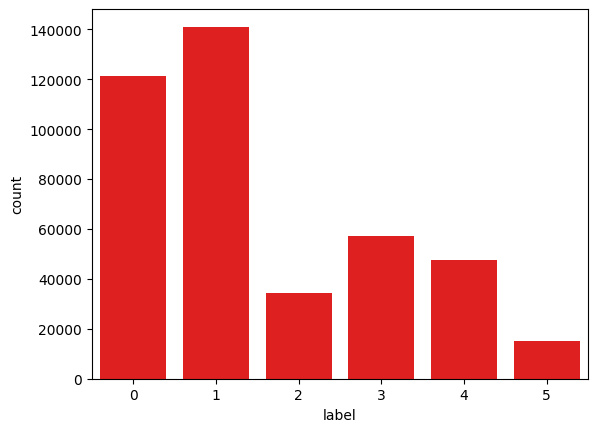

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data = df, x= 'label',color='red')

Joyfull text is Highest in the data.

In [ ]:
df['length'] = df['Cleaned_text'].apply(lambda x:len(x))
df['length']

0          45
1         234
2          63
3          26
4         222
         ... 
416804    132
416805    111
416806     90
416807    222
416808    132
Name: length, Length: 416809, dtype: int64

In [ ]:
df['length'].max()

830

In [ ]:
df['length'].min()

2

<ipython-input-25-fbde3f5e37c1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label',y='length',data=df,palette='pastel')


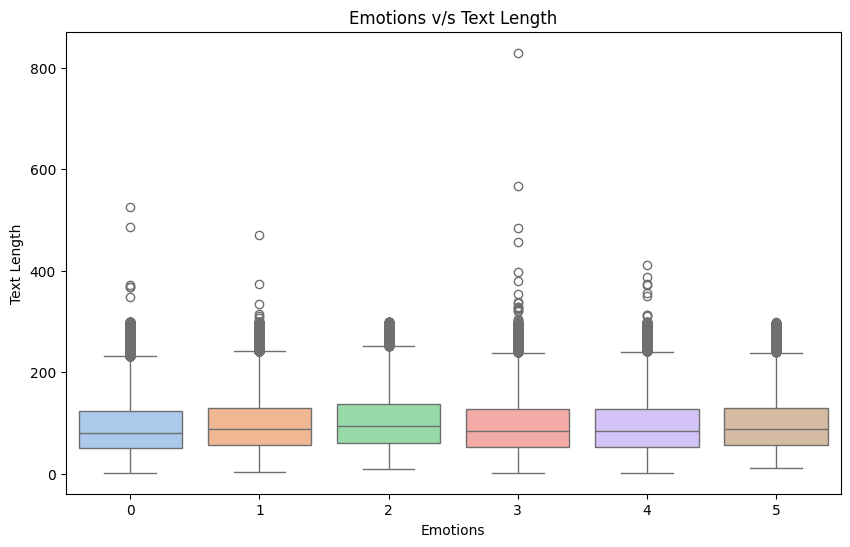

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='label',y='length',data=df,palette='pastel')
plt.title('Emotions v/s Text Length')
plt.xlabel('Emotions')
plt.ylabel('Text Length')
plt.show()

For Emotion Category 3 means Anger we have one text with maximum length 830 words.

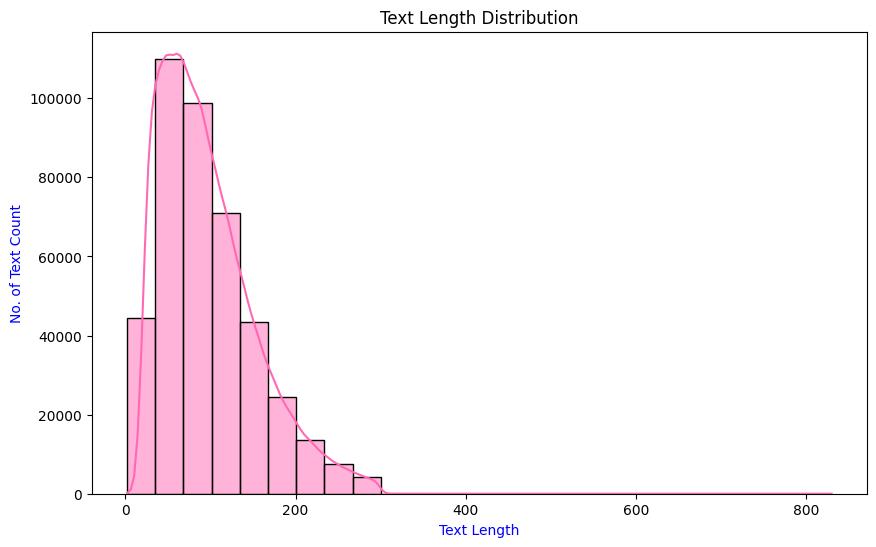

In [ ]:
# Text Distribution
plt.figure(figsize=(10,6))
sns.histplot(df,x='length',bins=25,kde=True,color='hotpink')
plt.title('Text Length Distribution')
plt.xlabel('Text Length',color='blue')
plt.ylabel('No. of Text Count',color='blue')
plt.show()

In [ ]:
df.head()

,Unnamed: 0,text,label,Cleaned_text,length
0,0,i just feel really helpless and heavy hearted,4,i just feel really helpless and heavy hearted,45
1,1,ive enjoyed being able to slouch about relax a...,0,ive enjoyed being able to slouch about relax a...,234
2,2,i gave up my internship with the dmrg and am f...,4,i gave up my internship with the dmrg and am f...,63
3,3,i dont know i feel so lost,0,i dont know i feel so lost,26
4,4,i am a kindergarten teacher and i am thoroughl...,4,i am a kindergarten teacher and i am thoroughl...,222


In [ ]:
df.label.unique()

array([4, 0, 2, 1, 5, 3])

## Data preprocessing:

In [ ]:
# Text Preprocessing for NN Models


In [ ]:
# Creating input and Output Data
x = df['Cleaned_text']
y = df['label']

In [ ]:
x.shape

(416809,)

In [ ]:
# Splitting data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train_label,y_test_label = train_test_split(x,y,test_size = 0.30,random_state=0)

In [ ]:
print(x_train.shape,y_train_label.shape,x_test.shape,y_test_label.shape)

(291766,) (291766,) (125043,) (125043,)


In [ ]:
# From test data , we will keep some data for validation and some data for testing
x_val,x_test,y_val_label,y_test_label = train_test_split(x_test,y_test_label,test_size = 0.5,random_state=42)

In [ ]:
print(x_val.shape,y_val_label.shape,x_test.shape,y_test_label.shape)

(62521,) (62521,) (62522,) (62522,)


In [ ]:
type(x_train)

pandas.core.series.Series

In [ ]:
x_train_input = list(x_train)
x_val_input = list(x_val)
x_test_input = list(x_test)


In [ ]:
y_train_label = list(y_train_label)
y_val_label = list(y_val_label)
y_test_label = list(y_test_label)

In [ ]:
type(x_train_input)

list

In [ ]:
type(y_train_label)

list

In [ ]:
x_train_input

['i feel a little stupid fir not advocating for myself better',
 'i stumbled through a number of replies but the honest one is when you ask that question i feel numb unfeeling blank as if i dont know what you are asking',
 'i feel scared because this is a very expensive procedure and there is so much at stake',
 'i figured that i ought to introduce myself and share how i feel about this wonderful experience so far now that i ve been with covenant for a few months now',
 'i blog about my daily life feelings and thoughts its boring i know',
 'i feel unsure of myself in some regards now but i also feel a heightened sense of fulfillment',
 'i can t help but feel surprised and when the younger ones keep joking i feel that i need to draw the line',
 'i think your comment swung the vote saying how i comment feels like a chat amongst friends is a lovely compliment and just how i feel when i write them',
 'i feel so jaded by words',
 'i am fortunate to feel passionate about many things but this

In [ ]:
x_train_input[1]

'i stumbled through a number of replies but the honest one is when you ask that question i feel numb unfeeling blank as if i dont know what you are asking'

**Integer encoding is the Data Preprocessing in which we convert the text data into Machince readable form.**

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token='shfhhfj')
token = Tokenizer()

In [ ]:
# Fitting the text
tokenizer.fit_on_texts(x_train_input)
tokenizer.fit_on_texts(x_val_input)
token.fit_on_texts(x_test_input)

In [ ]:
# Indexes of words
tokenizer.word_index

{'shfhhfj': 1,
 'i': 2,
 'feel': 3,
 'and': 4,
 'to': 5,
 'the': 6,
 'a': 7,
 'feeling': 8,
 'that': 9,
 'of': 10,
 'my': 11,
 'in': 12,
 'it': 13,
 'like': 14,
 'so': 15,
 'for': 16,
 'im': 17,
 'have': 18,
 'me': 19,
 'but': 20,
 'was': 21,
 'is': 22,
 'am': 23,
 'this': 24,
 'with': 25,
 'not': 26,
 'be': 27,
 'about': 28,
 'as': 29,
 'on': 30,
 'you': 31,
 'just': 32,
 'when': 33,
 'at': 34,
 'or': 35,
 'all': 36,
 'because': 37,
 'more': 38,
 'do': 39,
 'can': 40,
 'really': 41,
 't': 42,
 'up': 43,
 'know': 44,
 'by': 45,
 'are': 46,
 'very': 47,
 'been': 48,
 'out': 49,
 'myself': 50,
 'what': 51,
 'if': 52,
 'time': 53,
 'how': 54,
 'get': 55,
 'little': 56,
 'will': 57,
 'had': 58,
 'from': 59,
 'now': 60,
 'being': 61,
 'people': 62,
 'they': 63,
 'would': 64,
 'he': 65,
 'want': 66,
 'her': 67,
 'one': 68,
 'them': 69,
 'think': 70,
 'still': 71,
 'some': 72,
 'ive': 73,
 'even': 74,
 'who': 75,
 'much': 76,
 'we': 77,
 'an': 78,
 'life': 79,
 'its': 80,
 'him': 81,
 'there'

In [ ]:
# No. of Setences count
tokenizer.document_count

354287

In [ ]:
# Frequency Count
tokenizer.word_counts

OrderedDict([('i', 574574),
             ('feel', 246531),
             ('a', 138617),
             ('little', 16311),
             ('stupid', 2068),
             ('fir', 1),
             ('not', 40898),
             ('advocating', 19),
             ('for', 54476),
             ('myself', 18487),
             ('better', 4627),
             ('stumbled', 68),
             ('through', 5574),
             ('number', 606),
             ('of', 110530),
             ('replies', 40),
             ('but', 49701),
             ('the', 184015),
             ('honest', 879),
             ('one', 13685),
             ('is', 48605),
             ('when', 30527),
             ('you', 32939),
             ('ask', 1497),
             ('that', 111258),
             ('question', 695),
             ('numb', 1312),
             ('unfeeling', 57),
             ('blank', 1229),
             ('as', 34698),
             ('if', 18216),
             ('dont', 10669),
             ('know', 20131),
             ('w

In [ ]:
# Writing each sentence with respect to their index values
train_sent = tokenizer.texts_to_sequences(x_train_input)
val_sent = tokenizer.texts_to_sequences(x_val_input)
test_sent = token.texts_to_sequences(x_test_input)

In [ ]:
train_sent[0]

[2, 3, 7, 56, 337, 37624, 26, 9193, 16, 50, 179]

In [ ]:
val_sent[0]

[2, 44, 2, 3019, 8, 174, 10, 686, 2, 32, 238, 5, 230, 7, 851, 5, 7, 293]

In [ ]:
# Padding to make input shape same
from keras.utils import pad_sequences
train_seq = pad_sequences(train_sent,padding='post',maxlen = 178)
val_seq = pad_sequences(val_sent,padding='post',maxlen=178)
test_seq = pad_sequences(test_sent,padding='post',maxlen = 178)

In [ ]:
train_seq

array([[   2,    3,    7, ...,    0,    0,    0],
       [   2, 4216,  148, ...,    0,    0,    0],
       [   2,    3,  328, ...,    0,    0,    0],
       ...,
       [   2,   23,  507, ...,    0,    0,    0],
       [   2,  955,   57, ...,    0,    0,    0],
       [   2,   90,    6, ...,    0,    0,    0]], dtype=int32)

In [ ]:
len(train_seq[0])

178

In [ ]:
# shape of sequences/ whole Document
train_seq.shape

(291766, 178)

In [ ]:
val_seq.shape

(62521, 77)

In [ ]:
# Another way of padding
x_train_sequence = pad_sequences(train_sent,maxlen=101)

In [ ]:
x_train_sequence

array([[   0,    0,    0, ...,   16,   50,  179],
       [   0,    0,    0, ...,   31,   46,  947],
       [   0,    0,    0, ...,   76,   34, 8925],
       ...,
       [   0,    0,    0, ...,  215,   72, 4056],
       [   0,    0,    0, ...,    8,   26,  586],
       [   0,    0,    0, ...,    5, 2498, 4681]], dtype=int32)

In [ ]:
x_train_sequence.shape

(291766, 101)

In [ ]:
x_train_sequence[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           2,     3,     7,    56,   337, 37624,    26,  9193,    16,
          50,   179], dtype=int32)

In [ ]:
import numpy as np

train_seq_np = np.array(train_seq)
y_train_label_np = np.array(y_train_label)

val_seq_np = np.array(val_seq)
y_val_label_np = np.array(y_val_label)

test_seq_np = np.array(test_seq)
y_test_label_np = np.array(y_test_label)


# Since we feed our NN with numpy array

In [ ]:
train_seq_np.shape

(291766, 178)

In [ ]:
y_train_label_np.shape

(291766,)

In [ ]:
val_seq_np.shape

(62521, 178)

In [ ]:
y_val_label_np.shape

(62521,)

In [ ]:
test_seq_np.shape

(62522, 178)

In [ ]:
y_test_label_np.shape

(62522,)